In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Parameters


In [54]:
t_step = 0.1
t_last = 50 # 50h -> 1 point represent 1h
t = np.arange(0, 2500, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 1
q = 1
p = 0
par = x,y,p,q
k = 0
gamma = 0.1
mu = 2
beta = 0.2
alpha = 2.5
lilie = OnesidedCoupling(par, t,keep, k, mu, gamma, alpha, beta)

# Solutions

In [ ]:
xsol = lilie.x_solv()[:keep]
ysol = lilie.y_solv()[:keep]
psol = lilie.p_solv()[:keep]
qsol = lilie.q_solv()[:keep]


## Find Peaks

In [57]:
x_max = np.argmax(xsol)
y_max = np.argmax(ysol)
x_amplitude = find_peaks(xsol, height=(-np.repeat(xsol[x_max], keep), np.repeat(xsol[x_max], keep)))
y_amplitude = find_peaks(ysol, height=(-np.repeat(ysol[y_max], keep), np.repeat(ysol[y_max], keep)))

# Timeseries

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 2.50, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 0.00, q$_0$ = 1.00


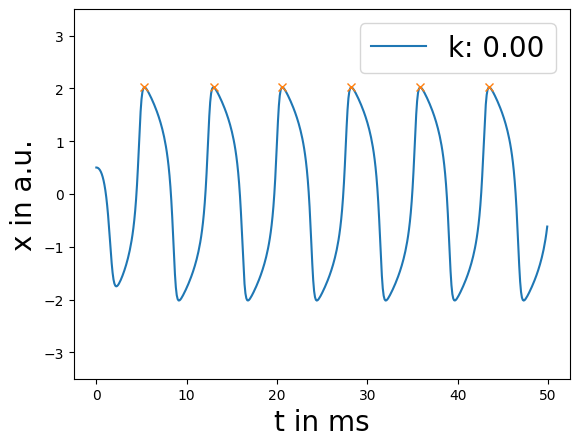

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 2.50, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 0.00, q$_0$ = 1.00


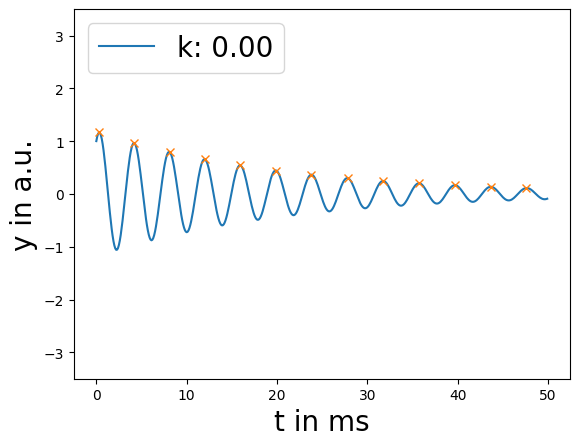

In [58]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x")
plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 20, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in y_amplitude[0]], y_amplitude[1]['peak_heights'], "x")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 20, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

# Randomstuff

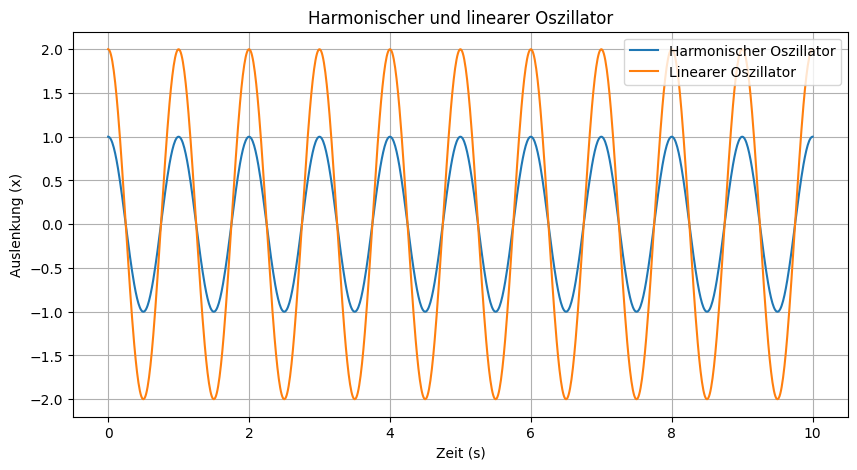

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen
A = 1  # Amplitude
omega = 2 * np.pi  # Kreisfrequenz (z.B. 1 Hz)
phi = 0  # Phasenverschiebung

# Zeitarray erstellen
t = np.linspace(0, 10, 1000)  # 2 Sekunden, 1000 Punkte

# Harmonischer Oszillator
x_harmonic = A * np.cos(omega * t + phi)

# Linearer Oszillator (z.B. Schwingungsgleichung)
A_lin = 2
x_linear = A_lin * np.exp(0 * omega * t) * np.cos(omega * t + phi)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(t, x_harmonic, label='Harmonischer Oszillator')
plt.plot(t, x_linear, label='Linearer Oszillator')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung (x)')
plt.title('Harmonischer und linearer Oszillator')
plt.legend()
plt.grid(True)
plt.show()
